## Machine Predictive Maintenance
## Capstone Two - Graph for Presentation

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the updated data from the previous project, Capstone Two: EDA.
data = pd.read_csv('SavedData/data03.csv', index_col=0)

In [3]:
data.head()

,Machine failure,Type,Temperature,Rotationalspeed,Tool wear [hour]
UID,,,,,
1,0,M,308.6,1551,0.000000
2,0,L,308.7,1408,0.050000
3,0,L,308.5,1498,0.083333
4,0,L,308.6,1433,0.116667
5,0,L,308.7,1408,0.150000


In [4]:
# Initialize the tool number
tool_number = 0

# Create an empty list to store the tool numbers
tool_numbers = []

# Iterate through the 'Tool wear [hour]' column
for wear in data['Tool wear [hour]']:
    # Check if tool wear is reset to 0
    if wear == 0:
        # Increment the tool number
        tool_number += 1
    # Append the current tool number to the list
    tool_numbers.append(tool_number)

# Create a new column 'Tool Number' in the DataFrame
data['Tool Number'] = tool_numbers

data

,Machine failure,Type,Temperature,Rotationalspeed,Tool wear [hour],Tool Number
UID,,,,,,
1,0,M,308.6,1551,0.000000,1
2,0,L,308.7,1408,0.050000,1
3,0,L,308.5,1498,0.083333,1
4,0,L,308.6,1433,0.116667,1
5,0,L,308.7,1408,0.150000,1
...,...,...,...,...,...,...
9996,0,M,308.4,1604,0.233333,120
9997,0,H,308.4,1632,0.283333,120
9998,0,M,308.6,1645,0.366667,120


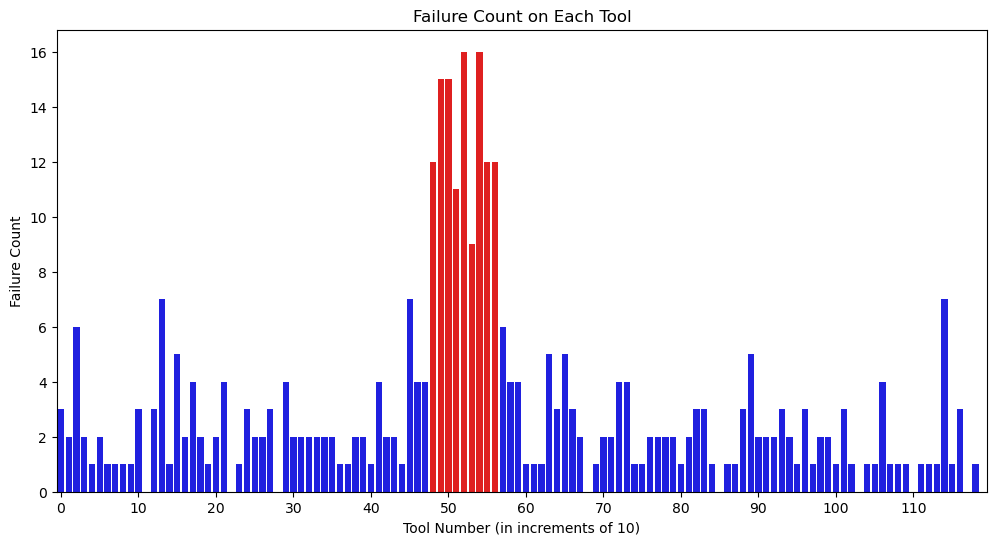

In [5]:
# Group the data by 'Tool Number' and count failures
failure_counts = data.groupby('Tool Number')['Machine failure'].sum()

# Create a list of colors where tool numbers 48 to 56 are red, and the rest are blue
colors = ['red' if 49 <= x <= 57 else 'blue' for x in failure_counts.index]

# Create a bar plot with conditional coloring
plt.figure(figsize=(12, 6))
sns.barplot(x=failure_counts.index, y=failure_counts.values, palette=colors)
plt.title('Failure Count on Each Tool')
plt.xlabel('Tool Number (in increments of 10)')
plt.ylabel('Failure Count')

# Set X-axis ticks to show every 10
plt.xticks(range(0, len(failure_counts.index), 10), labels=[str(i) for i in range(0, len(failure_counts.index), 10)])

plt.show()

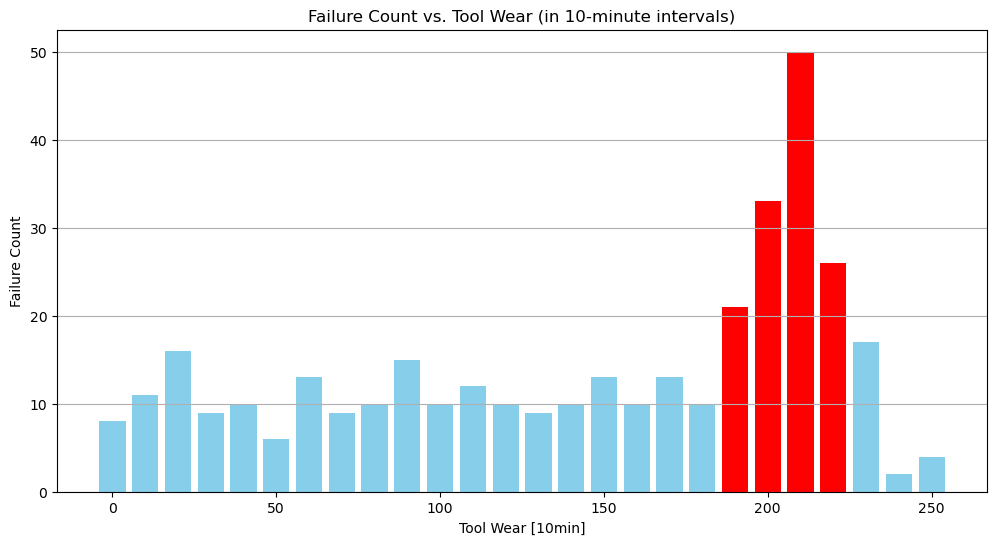

In [6]:
# Round 'Tool wear [hour]' to the nearest 10 minutes (1/6 hour)
data['Tool wear [10min]'] = (data['Tool wear [hour]'] * 60 / 10).round() * 10

# Group the data by 'Tool wear [10min]' and count failures
failure_counts = data.groupby('Tool wear [10min]')['Machine failure'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))

# Set the color for bars from 190 to 220 to red
colors = np.where((failure_counts.index >= 190) & (failure_counts.index <= 220), 'red', 'skyblue')

plt.bar(failure_counts.index, failure_counts.values, width=8, color=colors)
plt.title('Failure Count vs. Tool Wear (in 10-minute intervals)')
plt.xlabel('Tool Wear [10min]')
plt.ylabel('Failure Count')
plt.grid(axis='y')
plt.show()

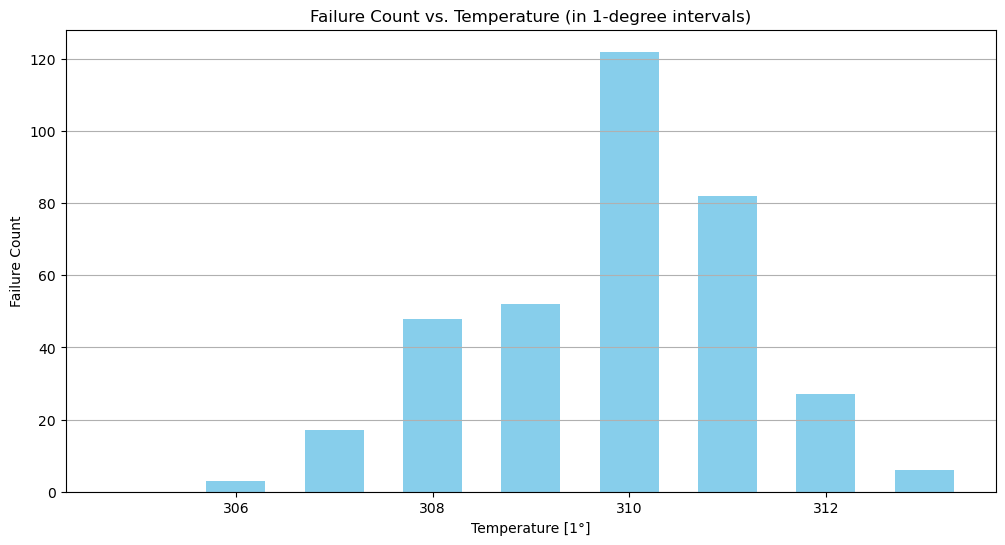

In [19]:
# Round 'Temperature' to the nearest 1 degree
data['Temperature [1°]'] = data['Temperature'] // 1

# Group the data by 'Temperature [1°]' and count failures
failure_counts = data.groupby('Temperature [1°]')['Machine failure'].sum()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(failure_counts.index, failure_counts.values, width=0.6, color='skyblue')
plt.title('Failure Count vs. Temperature (in 1-degree intervals)')
plt.xlabel('Temperature [1°]')
plt.ylabel('Failure Count')
plt.grid(axis='y')
plt.show()